# Setup to view Decision Trees in Python

<img src="http://i.stack.imgur.com/hwGVa.png"/ width="500">

Viewing the decision trees will help us gain a lot of insight into the paths and reasonings behind the model. If you would like to view the decision trees (helpful), use the following steps, which have been [modified from SKLearn's documentation](http://scikit-learn.org/dev/modules/tree.html#classification):


1. Try importing `pydot`. If it does not work, you will need to install it from the command line. `pip install pydot`. Pydot will allow us to create dot files (a special kind of graphics file).
2. Try running the code below. If you get an error regarding `Couldn't import dot_parser, loading of dot files will not be possible.`, reference this [stackoverflowpost](http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will)
3. You may need to separately install graphviz. 
  1. Try running in your command line: `brew install graphviz` if you have brew installed.
  2. You can install it from the official site (if its up) at [graphviz.org](http://www.graphviz.org/Download_macos.php). 
  3. Alternatively, I had to install it from an [alternate link](http://download.cnet.com/Graphviz/3000-2054_4-50791.html). Graphviz is what allows us to view dot files and convert them from dot to png and other more readily available formats.

If the below lines work correctly, you should be able to view a sample decision tree. Note that this may cause a lot of headache, so don't worry too much if you can't get it right away. Might take some googling and stack overflow searches on your part later on.


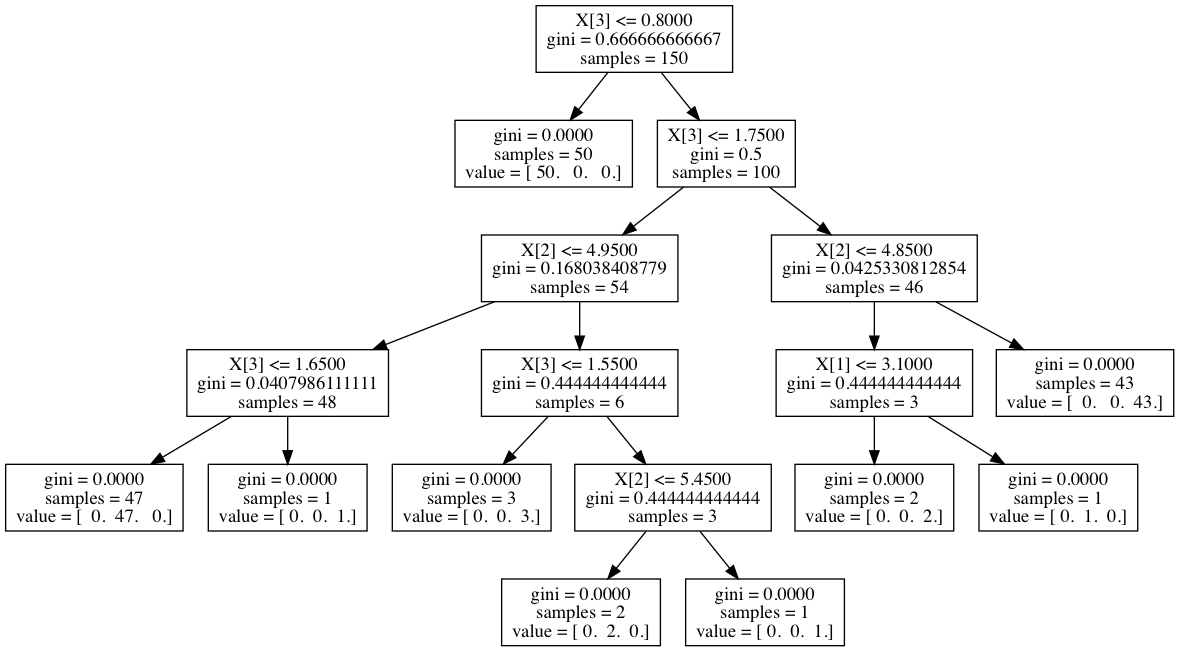

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import tree
from sklearn import datasets

# Imports to allow us to write to io and view images in ipython
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

%matplotlib inline

# Fit a sample decision tree
iris = datasets.load_iris()
model = tree.DecisionTreeClassifier()
model.fit(iris.data,iris.target)

# Write a decision tree to a stringIO buffer using tree.export_graphviz
dot_data = StringIO()
tree.export_graphviz(model,out_file=dot_data)

# From the stringio, create a graph and output to screen
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [10]:
# Once we have converted a dot to a graph, we can write out the graph to any format
graph.write_pdf("iris.pdf")

# Alternative method that writes to a file
tree.export_graphviz(model,out_file="blah.dot")
import os
os.system("dot -Tpdf blah.dot -o iris2.pdf")
os.unlink("blah.dot")